# Data Scaling

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
np.random.seed(666)

In [3]:
data = np.random.randint(low=20, high=100, size=15)

In [4]:
data

array([22, 65, 50, 82, 90, 93, 50, 56, 81, 71, 80, 48, 34, 83, 36])

In [5]:
data.mean()

62.733333333333334

In [6]:
data.std()

21.49873381284478

In [7]:
data.min()

22

In [8]:
data.max()

93

In [9]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, MaxAbsScaler, RobustScaler

In [10]:
scalers = {
    'MinMaxScaler': MinMaxScaler(),
    'MaxAbsScaler': MaxAbsScaler(),
    'StandardScaler': StandardScaler(),
    'RobustScaler': RobustScaler()
}

In [11]:
incomes = np.random.randint(low=60_000, high=2_00_000, size=10_000)
incomes[:5]

array([118151, 104101, 149810, 125740, 125349])

In [12]:
incomes.mean()

129712.0927

In [13]:
incomes.std()

40809.24843779541

In [14]:
incomes = np.append(incomes, 10)

In [15]:
incomes = np.append(incomes, 2_00_000*3)

In [16]:
incomes[:5]

array([118151, 104101, 149810, 125740, 125349])

In [17]:
incomes[-5:]

array([ 77278,  74435,  90725,     10, 600000])

In [18]:
incomes.mean()

129746.14447110578

In [19]:
incomes.std()

41095.683010878376

In [20]:
for sca in scalers:
    print(f'Using {sca} scalers:')
    scaled_data = scalers[sca].fit_transform(data.reshape(-1, 1))
    print(scaled_data)
    print('-'*28)

Using MinMaxScaler scalers:
[[0.        ]
 [0.6056338 ]
 [0.3943662 ]
 [0.84507042]
 [0.95774648]
 [1.        ]
 [0.3943662 ]
 [0.47887324]
 [0.83098592]
 [0.69014085]
 [0.81690141]
 [0.36619718]
 [0.16901408]
 [0.85915493]
 [0.1971831 ]]
----------------------------
Using MaxAbsScaler scalers:
[[0.23655914]
 [0.69892473]
 [0.53763441]
 [0.88172043]
 [0.96774194]
 [1.        ]
 [0.53763441]
 [0.60215054]
 [0.87096774]
 [0.76344086]
 [0.86021505]
 [0.51612903]
 [0.3655914 ]
 [0.89247312]
 [0.38709677]]
----------------------------
Using StandardScaler scalers:
[[-1.89468523]
 [ 0.10543257]
 [-0.59228294]
 [ 0.89617681]
 [ 1.26829175]
 [ 1.40783485]
 [-0.59228294]
 [-0.31319674]
 [ 0.84966244]
 [ 0.38451877]
 [ 0.80314807]
 [-0.68531168]
 [-1.33651282]
 [ 0.94269118]
 [-1.24348408]]
----------------------------
Using RobustScaler scalers:
[[-1.32307692]
 [ 0.        ]
 [-0.46153846]
 [ 0.52307692]
 [ 0.76923077]
 [ 0.86153846]
 [-0.46153846]
 [-0.27692308]
 [ 0.49230769]
 [ 0.18461538]
 

In [21]:
from sklearn.preprocessing import KBinsDiscretizer

In [29]:
discritizer = KBinsDiscretizer(n_bins=4, encode='onehot-dense')

In [30]:
discritizer.fit_transform(data.reshape(-1, 1))

array([[1., 0., 0., 0.],
       [0., 0., 1., 0.],
       [0., 1., 0., 0.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [0., 0., 0., 1.],
       [1., 0., 0., 0.]])

In [31]:
data

array([22, 65, 50, 82, 90, 93, 50, 56, 81, 71, 80, 48, 34, 83, 36])

In [32]:
discritizer.bin_edges_

array([array([22. , 49. , 65. , 81.5, 93. ])], dtype=object)

In [33]:
not_normal = np.random.lognormal(0, 1, 10_000).reshape(-1, 1)
not_normal[:5]

array([[0.2937824 ],
       [1.92538391],
       [0.30356966],
       [0.18572877],
       [1.39870679]])

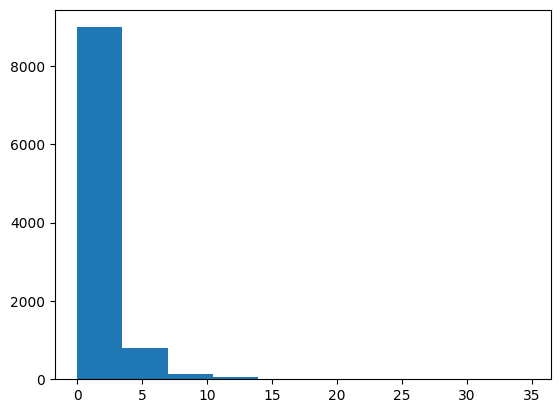

In [34]:
plt.hist(not_normal)
plt.show()

In [35]:
from sklearn.preprocessing import PowerTransformer

In [40]:
transformer = PowerTransformer(method='box-cox')
# method = ['yeo-johnson', 'box-cox']

In [41]:
normal = transformer.fit_transform(not_normal)

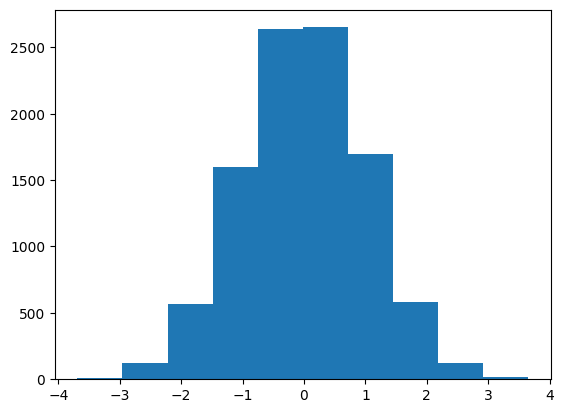

In [42]:
plt.hist(normal)
plt.show()